<a href="https://colab.research.google.com/github/SyedWaqar-ah/practiceInColab/blob/master/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])

17465344/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [4]:
# As Argument num_words restricts function to load only 10,000 most used words.
#To check we can execute the above snippet it will display the max word index in
#train_data
max([max(sequence) for sequence in train_data])

9999

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 159us/sample - loss: 0.4637 - acc: 0.8113 - val_loss: 0.3663 - val_acc: 0.8585
Epoch 2/20
25000/25000 [==============================] - 4s 147us/sample - loss: 0.2643 - acc: 0.9086 - val_loss: 0.2977 - val_acc: 0.8813
Epoch 3/20
25000/25000 [==============================] - 4s 149us/sample - loss: 0.2030 - acc: 0.9281 - val_loss: 0.3252 - val_acc: 0.8683
Epoch 4/20
25000/25000 [==============================] - 4s 147us/sample - loss: 0.1709 - acc: 0.9391 - val_loss: 0.2921 - val_acc: 0.8848
Epoch 5/20
25000/25000 [==============================] - 4s 145us/sample - loss: 0.1473 - acc: 0.9478 - val_loss: 0.3413 - val_acc: 0.8690
Epoch 6/20
25000/25000 [==============================] - 4s 150us/sample - loss: 0.1283 - acc: 0.9563 - val_loss: 0.3500 - val_acc: 0.8698
Epoch 7/20
25000/25000 [==============================] - 4s 149us/sample - loss: 0.1150 - acc: 0.9602 - val_l

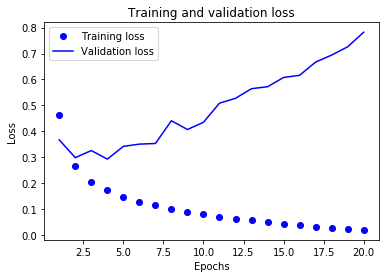

<Figure size 432x288 with 0 Axes>

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

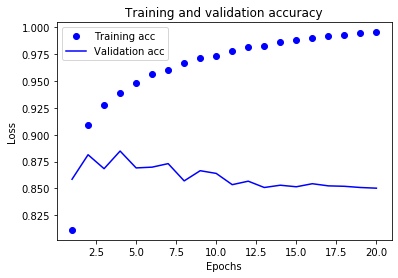

In [13]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()